In [ ]:
%pip install seaborn

In [1]:
import time
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import  StandardScaler

plt.style.use('ggplot')

df=pd.read_csv('/DBMS-Performance-Monitor-Log.csv',sep='\t',decimal=',')
df.head()

df.info()

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
dt=df.describe()
dt=dt[['CPU','Disk 1','Disk 2']]
dt

,CPU,Disk 1,Disk 2
count,200.000000,200.000000,200.00000
mean,238.204106,51.375000,44.84500
std,165.862629,26.994777,26.42142
min,23.597000,5.000000,7.00000
25%,104.439522,33.000000,26.25000
50%,151.624667,63.000000,39.00000
75%,418.051750,72.000000,68.00000
max,507.450000,85.000000,92.00000


In [ ]:
dt.loc['cv']=dt.loc['std'].values/dt.loc['mean'].values
dt.round(2)  #.to_latex()

<ipython-input-16-3e9376a385a7>:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  dt.round(2).to_latex()


'\\begin{tabular}{lrrr}\n\\toprule\n{} &     CPU &  Disk 1 &  Disk 2 \\\\\n\\midrule\ncount &  200.00 &  200.00 &  200.00 \\\\\nmean  &  238.20 &   51.38 &   44.84 \\\\\nstd   &  165.86 &   26.99 &   26.42 \\\\\nmin   &   23.60 &    5.00 &    7.00 \\\\\n25\\%   &  104.44 &   33.00 &   26.25 \\\\\n50\\%   &  151.62 &   63.00 &   39.00 \\\\\n75\\%   &  418.05 &   72.00 &   68.00 \\\\\nmax   &  507.45 &   85.00 &   92.00 \\\\\ncv    &    0.70 &    0.53 &    0.59 \\\\\n\\bottomrule\n\\end{tabular}\n'

<Axes: >

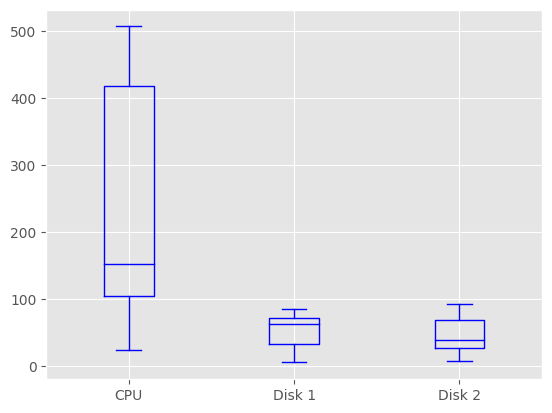

In [ ]:
df[['CPU','Disk 1','Disk 2']].boxplot(color='blue')

array([[<Axes: title={'center': 'CPU'}>,
        <Axes: title={'center': 'Disk 1'}>],
       [<Axes: title={'center': 'Disk 2'}>, <Axes: >]], dtype=object)

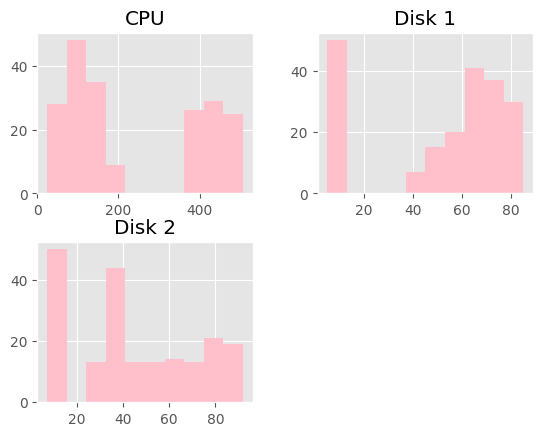

In [ ]:
df[['CPU','Disk 1','Disk 2']].hist(color='pink')

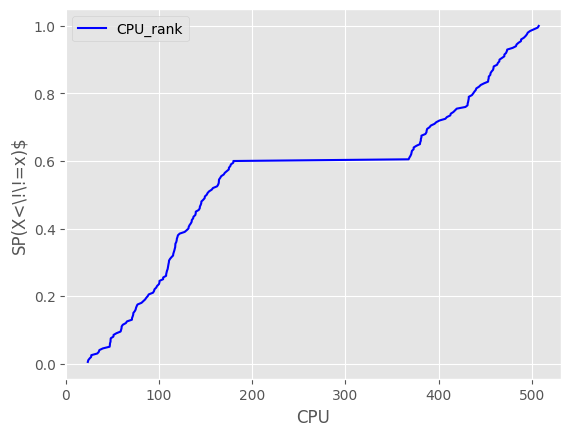

In [ ]:
#Função de distribuição acumulada
df['CPU_rank']=df['CPU'].rank(method='average',pct=True)
df.sort_values('CPU').plot(x='CPU',y='CPU_rank',grid=True,color='blue')
plt.ylabel(r"SP(X<\!\!=x)$")
plt.draw()

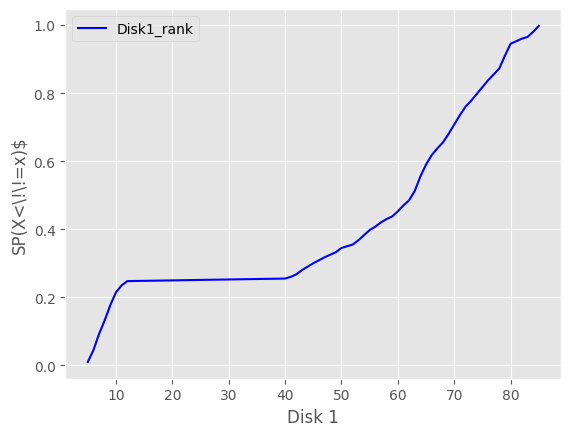

In [ ]:
df['Disk1_rank']=df['Disk 1'].rank(method='average',pct=True)
df.sort_values('Disk 1').plot(x='Disk 1',y='Disk1_rank',grid=True,color='blue')
plt.ylabel(r"SP(X<\!\!=x)$")
plt.draw()

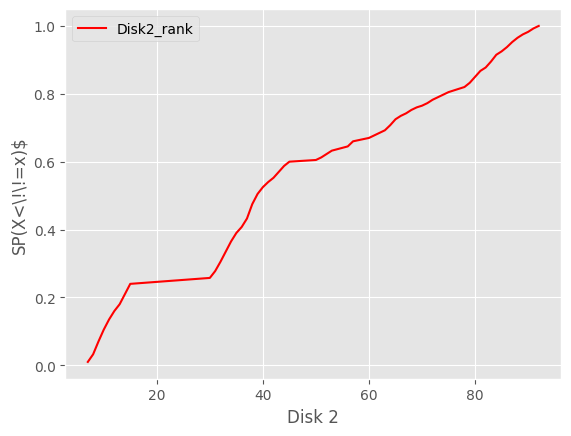

In [ ]:
df['Disk2_rank']=df['Disk 2'].rank(method='average',pct=True)
df.sort_values('Disk 2').plot(x='Disk 2',y='Disk2_rank',grid=True,color='red')
plt.ylabel(r"SP(X<\!\!=x)$")
plt.draw()

<Axes: xlabel='CPU', ylabel='Disk 1'>

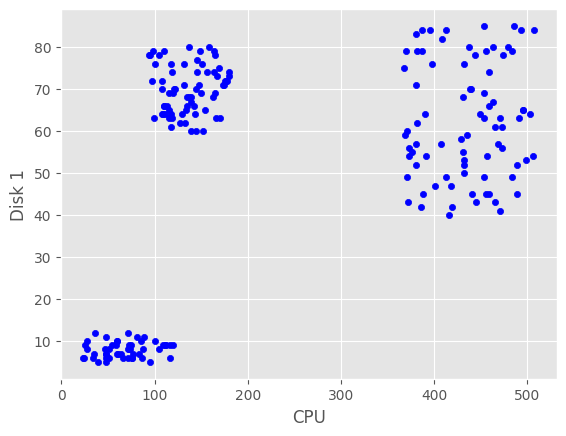

In [ ]:
#Clusters naturais
df.plot.scatter(x='CPU',y='Disk 1',color='blue')

<Axes: xlabel='CPU', ylabel='Disk 2'>

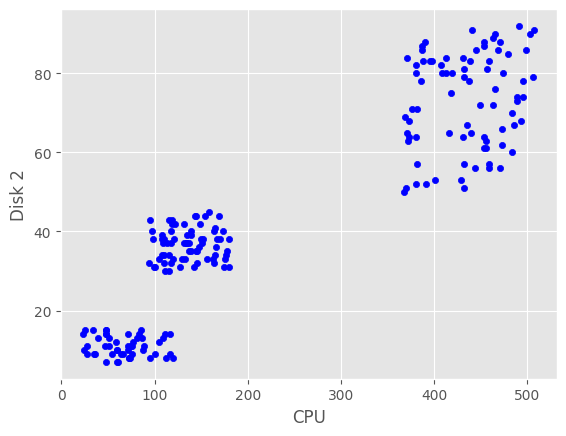

In [ ]:

df.plot.scatter(x='CPU',y='Disk 2',color='blue')

<Axes: xlabel='Disk 1', ylabel='Disk 2'>

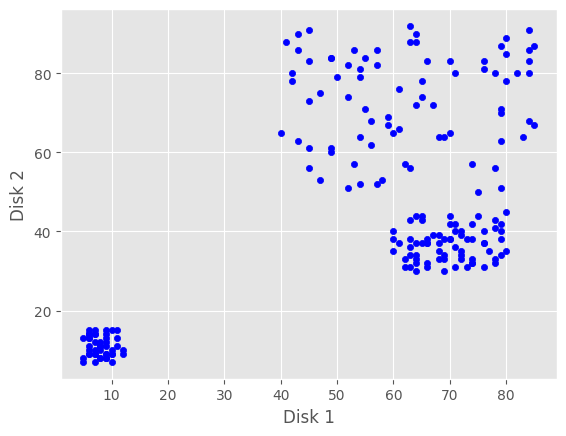

In [ ]:

df.plot.scatter(x='Disk 1',y='Disk 2',color='blue')

<Axes: xlabel='CPU', ylabel='Disk'>

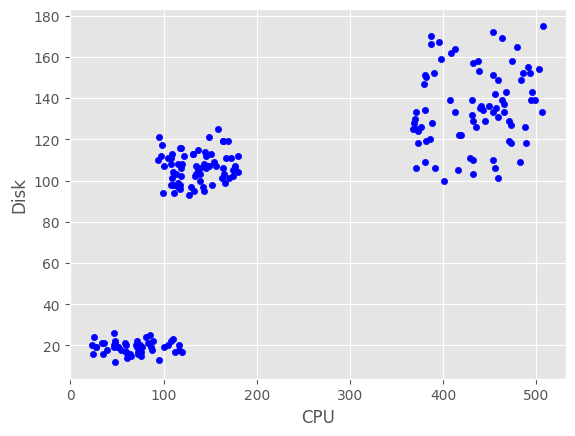

In [ ]:
#Nova celula cria 1 nova coluna coma  soma dos 2 discos
df['Disk']=df['Disk 1']+df['Disk 2']

df.plot.scatter(x='CPU',y='Disk',color='blue')

In [ ]:
df[['CPU','Disk 1','Disk 2']].corr('pearson')

,CPU,Disk 1,Disk 2
CPU,1.000000,0.465376,0.916320
Disk 1,0.465376,1.000000,0.625876
Disk 2,0.916320,0.625876,1.000000


In [ ]:
df[['CPU','Disk 1','Disk 2']].corr('spearman')

,CPU,Disk 1,Disk 2
CPU,1.000000,0.452286,0.883539
Disk 1,0.452286,1.000000,0.474939
Disk 2,0.883539,0.474939,1.000000


Não precisa de transformar os dados e ai podemos usar pearson, caso precisasse usariamos spearman
Mias tempo de cpu mais IO no disk 2


<ipython-input-30-40b4111dd6c7>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask= np.triu(np.ones_like(df[['CPU','Disk 1','Disk 2']].corr(),dtype=np.bool))


<Axes: >

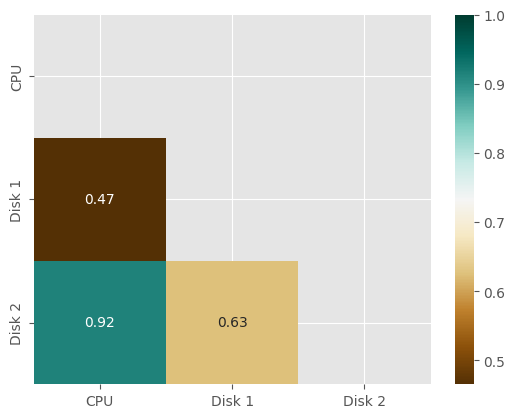

In [ ]:
#cor escura correlação forte, cor clara coorrelação fraca
mask= np.triu(np.ones_like(df[['CPU','Disk 1','Disk 2']].corr(),dtype=np.bool))
sns.heatmap(df[['CPU','Disk 1','Disk 2']].corr(), mask=mask, cmap='BrBG',vmax=1,annot=True)